Columnas: ['targetid', 'survey', 'program', 'desi_target', 'z', 'zwarn', 'spectype', 'desiname', 'specid', 'redshift']
Forma de X: (492, 7781)
Forma de y: (492,)
Entrenando modelo...
MSE: 0.576873
R2 Score: -0.4719


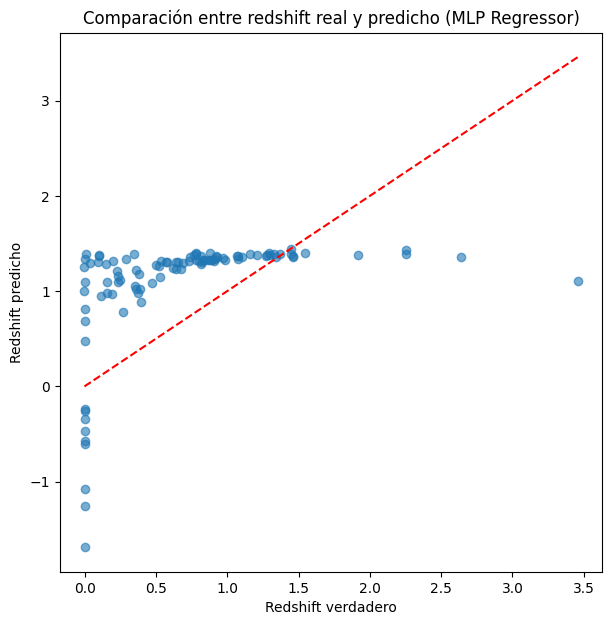

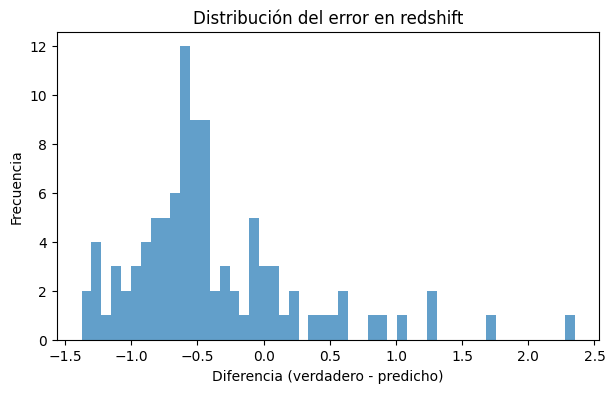

In [5]:
#Usando specttype en las X´s y usando en las Y's la parte de redshifts... Usamos regresion para predecir el redshift de alguna entrada.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Datos
df_spectra = pd.read_csv(r'balanced_spectra_features.csv')
print("Columnas:", df_spectra.columns.tolist())

data = np.load(r'balanced_spectra_flux.npz', allow_pickle=True)
ids = data['targetids']
flujo_ar = data['flux_arrays']

flujo_dict = {tid: flux for tid, flux in zip(ids, flujo_ar)}

X = []
y = []

for tid in ids:
    spectype = df_spectra.loc[df_spectra['targetid'] == tid]
    if not spectype.empty:
        X.append(flujo_dict[tid])
        y.append(spectype['redshift'].values[0])

X = np.array(X)
y = np.array(y)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

print("Entrenando modelo...")
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.6f}")
print(f"R2 Score: {r2:.4f}")

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Redshift verdadero")
plt.ylabel("Redshift predicho")
plt.title("Comparación entre redshift real y predicho (MLP Regressor)")
plt.show()

# Diferencias
diff = y_test - y_pred
plt.figure(figsize=(7,4))
plt.hist(diff, bins=50, alpha=0.7)
plt.xlabel("Diferencia (verdadero - predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución del error en redshift")
plt.show()

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [ ]:
#Podemos mejorar el modelo implementando redes convolucionales CNN.

Datos cargados: (492, 7781) (492,)
Entrada CNN: (492, 7781, 1)
Train/test shapes: (393, 7781, 1) (99, 7781, 1)


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 7773, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7773, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3886, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 3882, 64)       │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3882, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1941, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1939, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1939, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545 (174.00 KB)

 Trainable params: 44,097 (172.25 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 816ms/step - loss: 0.5991 - mae: 0.5987 - val_loss: 0.9821 - val_mae: 0.7149 - learning_rate: 1.0000e-04
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.4807 - mae: 0.5251 - val_loss: 0.9304 - val_mae: 0.6843 - learning_rate: 1.0000e-04
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.4659 - mae: 0.5247 - val_loss: 0.8649 - val_mae: 0.6465 - learning_rate: 1.0000e-04
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 0.4420 - mae: 0.5057 - val_loss: 0.8059 - val_mae: 0.6162 - learning_rate: 1.0000e-04
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.3857 - mae: 0.4789 - val_loss: 0.7613 - val_mae: 0.5944 - learning_rate: 1.0000e-04
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 979ms/step - loss: 0.3905 - mae: 0.4699 - val_loss: 0.7057 - val_mae: 0.5674 - learning_rate: 1.0000e-04
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 948ms/step - loss: 0.4045 - mae: 0.4673 - val_loss: 0.6608 - val_mae: 0.5493 - learning_

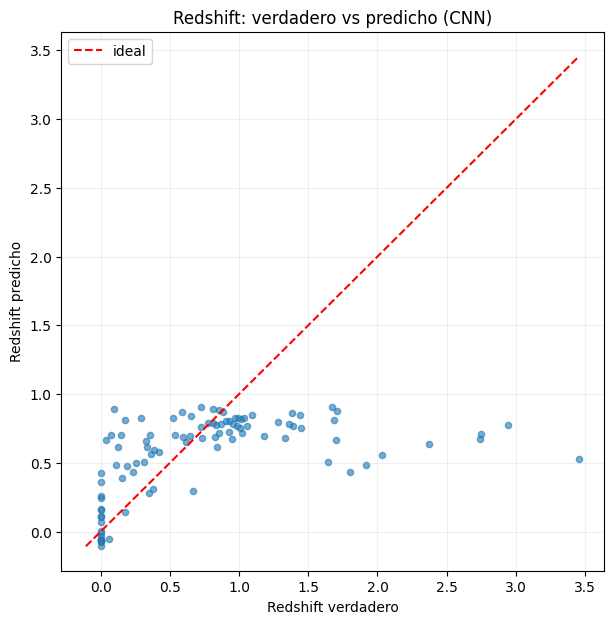

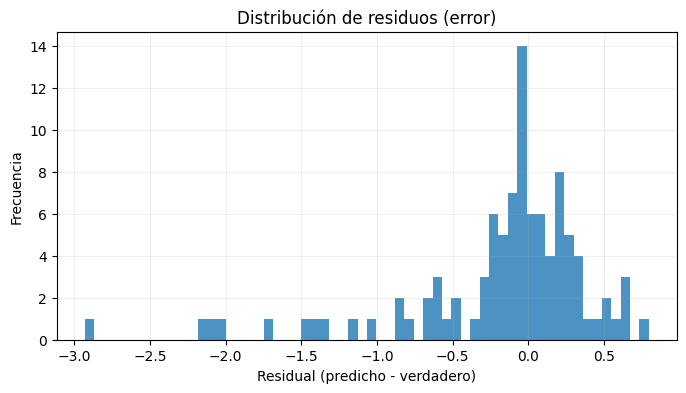

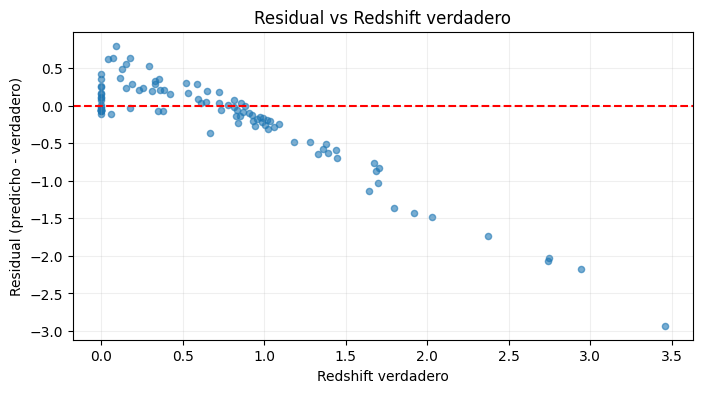

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

csv_path = r'C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\balanced_spectra_features.csv'
npz_path = r'C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\balanced_spectra_flux.npz'

df = pd.read_csv(csv_path)
npz = np.load(npz_path, allow_pickle=True)
targetids = npz['targetids']
flux_arrays = npz['flux_arrays']

X_list = []
y_list = []
spectype_list = []  

for i, tid in enumerate(targetids):
    row = df.loc[df['targetid'] == tid]
    if row.empty:
        continue
    redshift = row['redshift'].values[0]
    if pd.isna(redshift):
        continue
    X_list.append(flux_arrays[i])
    y_list.append(float(redshift))
    spectype_list.append(row['spectype'].values[0])

X = np.asarray(X_list)         
y = np.asarray(y_list)         
spectypes = np.asarray(spectype_list)

print("Datos cargados:", X.shape, y.shape)

# Normalización por espectro: divide por el valor absoluto máximo de cada espectro
eps = 1e-12
X_norm = X / (np.max(np.abs(X), axis=1, keepdims=True) + eps)

esc = StandardScaler()
X_flat = esc.fit_transform(X_norm)   

# Convertimos 3D para Conv1D
X_cnn = np.expand_dims(X_flat, axis=-1)
print("Entrada CNN:", X_cnn.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42, stratify=spectypes
)
print("Train/test shapes:", X_train.shape, X_test.shape)

# Nueva arquitectura CNN
input_forma = (X_train.shape[1], 1)

def build_reg_cnn(input_forma):
    modelo = models.Sequential([
        layers.Conv1D(32, kernel_size=9, activation='relu', input_shape=input_forma),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),

        layers.Conv1D(64, kernel_size=5, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),

        layers.Conv1D(128, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(1, activation='linear')  
    ])

    modelo.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='mse',
        metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')]
    )
    return modelo

modelo = build_reg_cnn(input_forma)
modelo.summary()

cb_early = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
cb_rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

history = modelo.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=32,
    callbacks=[cb_early, cb_rlr],
    verbose=1
)

y_pred = modelo.predict(X_test).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R2: {r2:.4f}")

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, s=20)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], color='red', linestyle='--', label='ideal')
plt.xlabel('Redshift verdadero')
plt.ylabel('Redshift predicho')
plt.title('Redshift: verdadero vs predicho (CNN)')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

residuals = y_pred - y_test
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=60, alpha=0.8)
plt.xlabel('Residual (predicho - verdadero)')
plt.ylabel('Frecuencia')
plt.title('Distribución de residuos (error)')
plt.grid(alpha=0.2)
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(y_test, residuals, alpha=0.6, s=20)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Redshift verdadero')
plt.ylabel('Residual (predicho - verdadero)')
plt.title('Residual vs Redshift verdadero')
plt.grid(alpha=0.2)
plt.show()
